### 【目的】 パラメータ、学習データ量、特徴削減が性能に及ぼす影響を実験する。

- 再帰特徴削減（RFE）
- 検証曲線
- 学習曲線



<参考>
- [yellow brick](https://www.scikit-yb.org/en/latest/)
- [ハイパーパラメーターの値と予測性能の関係を図示したグラフ](https://axa.biopapyrus.jp/machine-learning/model-evaluation/validation-curve.html)

In [1]:
import numpy as np
import numpy.random as random
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from imblearn.datasets import fetch_datasets
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

import yellowbrick
import pandas as pd
from yellowbrick.datasets import load_bikeshare
from yellowbrick.datasets import load_energy
from yellowbrick.datasets import load_game

from yellowbrick.model_selection import ValidationCurve
from sklearn.tree import DecisionTreeRegressor

/Users/macbookpro/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


#  
# yellow brick dataset

#   
## Validation Courve
ハイパーパラメーターの値と予測性能の関係を示した折れ線グラフである。検証曲線の横軸は、ハイパーパラメーターの値であり、縦軸は評価指標である。評価指標は、訓練データを使った時の評価指標と検証データを使った時の評価指標の両方をプロットする。両者の指標で描かれた曲線の離れ具合で、最適なハイパーパラメーターの取りうる値を大まかに把握することができる。
sklearnでも提供されている。

Parameters<br>
    ----------<br>
    
    model : a scikit-learn estimator
        An object that implements ``fit`` and ``predict``, can be a
        classifier, regressor, or clusterer so long as there is also a valid
        associated scoring metric.
    
        Note that the object is cloned for each validation.

    param_name : string
        Name of the parameter that will be varied.

    param_range : array-like, shape (n_values,)
        The values of the parameter that will be evaluated.

    ax : matplotlib.Axes object, optional
        The axes object to plot the figure on.

    logx : boolean, optional
        If True, plots the x-axis with a logarithmic scale.

    groups : array-like, with shape (n_samples,)
        Optional group labels for the samples used while splitting the dataset
        into train/test sets.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        see the scikit-learn
        `cross-validation guide <https://bit.ly/2MMQAI7>`_
        for more information on the possible strategies that can be used here.

    scoring : string, callable or None, optional, default: None
        A string or scorer callable object / function with signature
        ``scorer(estimator, X, y)``. See scikit-learn model evaluation
        documentation for names of possible metrics.
        (scikit-learn model evaluation metric)[https://scikit-learn.org/stable/modules/model_evaluation.html]

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).

    pre_dispatch : integer or string, optional
        Number of predispatched jobs for parallel execution (default is
        all). The option can reduce the allocated memory. The string can
        be an expression like '2*n_jobs'.

    kwargs : dict
        Keyword arguments that are passed to the base class and may influence
        the visualization as defined in other Visualizers.

learning


/Users/macbookpro/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


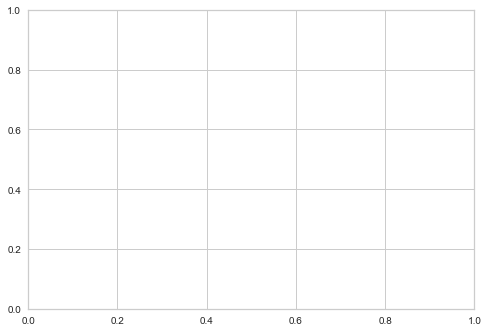

In [12]:
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedKFold

# Load a classification data set
X, y = load_game()

# Encode the categorical data with one-hot encoding
X = OneHotEncoder().fit_transform(X)

# Create the validation curve visualizer
cv = StratifiedKFold(12)
param_range = np.logspace(-6, -1, 12)

viz = ValidationCurve(
    SVC(), param_name="gamma", param_range=param_range,
    logx=True, cv=cv, scoring="accuracy", n_jobs=8,
)

viz.fit(X, y)
viz.show()

#  
## Learning Curve

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.svm import SVC

from yellowbrick.datasets import load_game
from yellowbrick.model_selection import LearningCurve

# Load a classification dataset
X, y = load_game()

# Encode the categorical data
X = OneHotEncoder().fit_transform(X)
y = LabelEncoder().fit_transform(y)

# Create the learning curve visualizer
cv = StratifiedKFold(n_splits=12)
sizes = np.linspace(0.1, 1.0, 10)

# Instantiate the classification model and visualizer
model = SVC()
visualizer = LearningCurve(
    model, 
    cv=cv, 
    scoring='accuracy', 
    train_sizes=sizes, 
    n_jobs=4
)

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

#  
## Recursive Feature Elimination

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

from yellowbrick.model_selection import RFECV
from yellowbrick.datasets import load_credit

# Load classification dataset
X, y = load_credit()

cv = StratifiedKFold(5)
model = RandomForestClassifier()
visualizer = RFECV(model, scoring='f1_weighted')

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

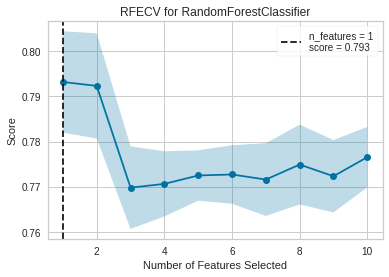


#  

<center>---------------------------------------------------------------------------------------------------------------------------------------</center>
<center>---------------------------------------------------------------------------------------------------------------------------------------</center>
<center>---------------------------------------------------------------------------------------------------------------------------------------</center>
 
# UCI dataset

In [23]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00510/Grisoni_et_al_2016_EnvInt88.csv")

X = df.iloc[:,3:-2]
y = df["Class"]

X.head(1)

,nHM,piPC09,PCD,X2Av,MLOGP,ON1V,N-072,B02[C-N],F04[C-O]
0,0,0.0,1.49,0.14,1.35,0.72,0,1,5


#  
## Validation Curve

/Users/macbookpro/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


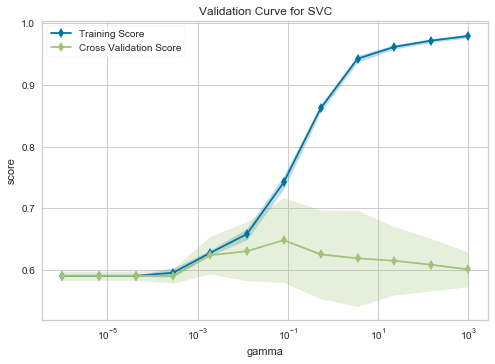

In [24]:
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedKFold

# Create the validation curve visualizer
cv = StratifiedKFold(12)
param_range = np.logspace(-6, 3, 12)

viz = ValidationCurve(
    SVC(), param_name="gamma", param_range=param_range,
    logx=True, cv=cv, scoring="accuracy", n_jobs=8,
)

viz.fit(X, y)
viz.show()

#  
## Learning Curve

/Users/macbookpro/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


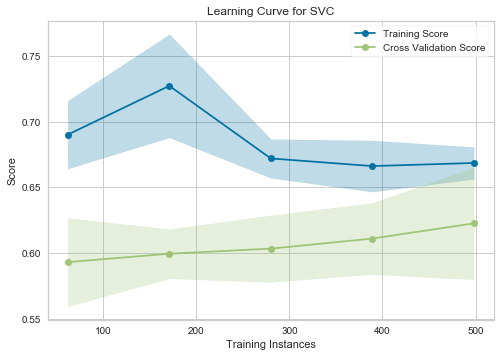

In [28]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.svm import SVC

from yellowbrick.datasets import load_game
from yellowbrick.model_selection import LearningCurve

# Create the learning curve visualizer
cv = StratifiedKFold(n_splits=5)
sizes = np.linspace(0.1, 0.8, 5)

# Instantiate the classification model and visualizer
model = SVC()
visualizer = LearningCurve(
    model, 
    cv=cv, 
    scoring='accuracy', 
    train_sizes=sizes, 
    n_jobs=4
)

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

#  
## RFE

/Users/macbookpro/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/Users/macbookpro/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


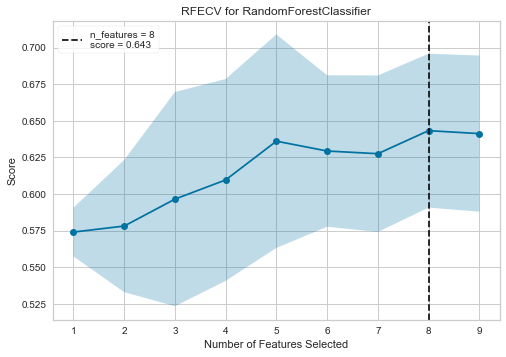

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

from yellowbrick.model_selection import RFECV
from yellowbrick.datasets import load_credit

cv = StratifiedKFold(5)
model = RandomForestClassifier()
visualizer = RFECV(model, scoring='f1_weighted')

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

### EDA

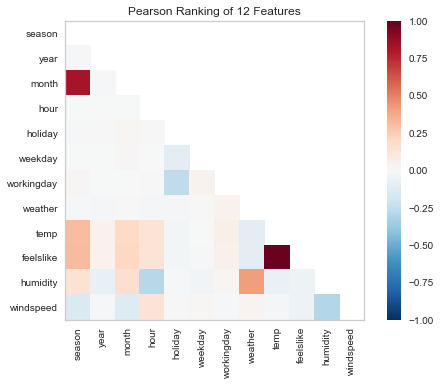

In [6]:
from yellowbrick.features import Rank2D
visualizer = Rank2D(algorithm="pearson")
visualizer.fit_transform(X, y)
visualizer.show()

/Users/macbookpro/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


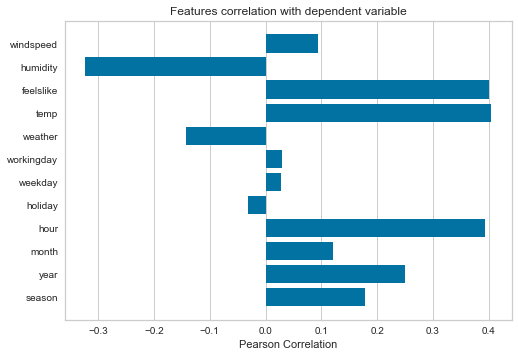

In [8]:
from yellowbrick.target import FeatureCorrelation
visualizer = FeatureCorrelation(labels=X.columns)
visualizer.fit(X, y) 
visualizer.show()  

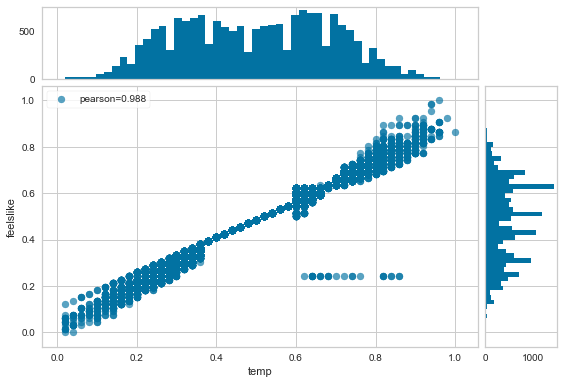

In [9]:
from yellowbrick.features import JointPlotVisualizer

visualizer = JointPlotVisualizer(columns=['temp', 'feelslike'])
visualizer.fit_transform(X, y)
visualizer.show()